In [1]:
import numpy as np
import sys
sys.path.append('C:/Users/Moiseev/Documents/vessels') #path to folder with programms
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
from patients import analysis

<matplotlib.colorbar.Colorbar instance at 0x000000002187F208>

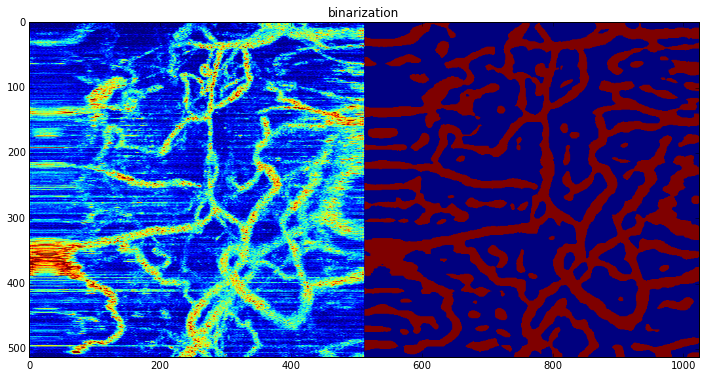

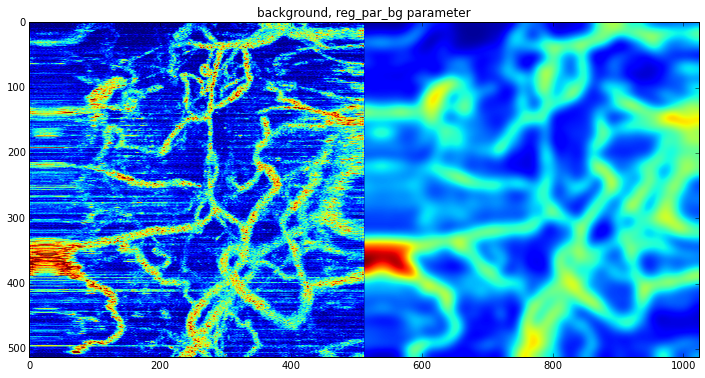

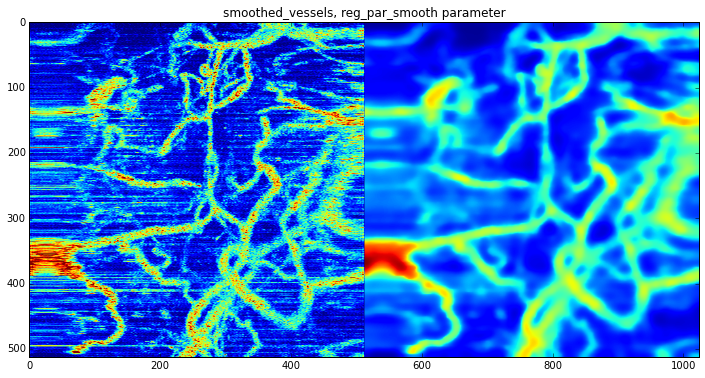

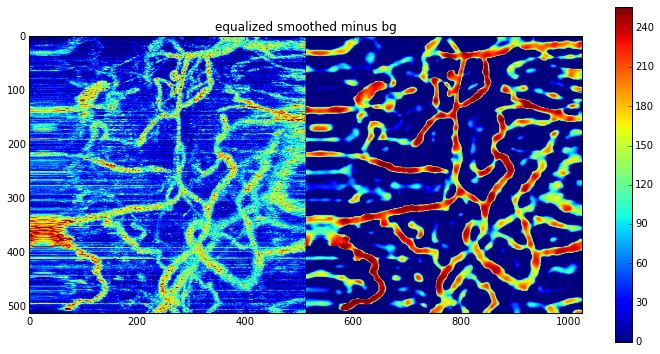

In [15]:
reload(analysis)

#algorithm parameters

reg_par_bg=110 #110, parameter for background estimation. bigger the paramenter, smoother the background. Should be bigger than
#reg_par_smooth parameter.
reg_par_smooth=100 #100, parameter for image smoothing after background subtraction; should be positive
threshold=30 #8, threshold value used for binarization. range 0-1
smallest_spot=16 #16, value used to remove isolated spots after thresholding (to avoid single puxels to be recognized as vessels).
#must be positive.

directory = 'C:/Users/Moiseev/Documents/MATLAB/flow/patients' #path to directory with folders with vessels images
foldername = 'Kargopoltsev' #name of the folder to be processed
filename = 'Kargopol_right_micro3x3_03.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png' #filename used for example


#################################################################################################################################
#################################################################################################################################

image = misc.imread(directory+'/'+foldername+'/'+filename)+.0
if len(image.shape)>2:
    image = np.mean(image,axis=-1)

binary_vessels,equalize_vessels,smooth_vessels,bg = analysis.enhance_simple(image,reg_par_bg,reg_par_smooth,threshold,smallest_spot)

#image_sub_bg = (image-bg) #bg.T)

width = 12
height = 12
fig,axes = plt.subplots(ncols=1,figsize=(width,height))
axes.set_title('binarization')
plt.imshow(np.append(image,np.max(image)*binary_vessels,axis=1))

#width = 6
#height = 6

fig,axes = plt.subplots(ncols=1,figsize=(width,height))
axes.set_title('background, reg_par_bg parameter')
#plt.imshow(np.append(image,bg.T,axis=1))
plt.imshow(np.append(image/np.max(image),bg/np.max(bg),axis=1))

fig,axes = plt.subplots(ncols=1,figsize=(width,height))
axes.set_title('smoothed_vessels, reg_par_smooth parameter')
plt.imshow(np.append(1.*image/np.max(image),smooth_vessels/np.max(smooth_vessels),axis=1),vmin=0)

fig,axes = plt.subplots(ncols=1,figsize=(width,height))
axes.set_title('equalized smoothed minus bg')
plt.imshow(256*np.append(1.*image/np.max(image),equalize_vessels/np.max(equalize_vessels),axis=1))
plt.colorbar(fraction=.125,shrink=.5)

In [14]:
reload(analysis)
vec,names = analysis.vec_in_folder(directory,foldername,reg_par_bg,reg_par_smooth,threshold,smallest_spot)

C:/Users/Moiseev/Documents/MATLAB/flow/patients/Kargopoltsev
Kargopolov_left_micro3x3_15.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png
('lngth', 8545)
Kargopolov_left_micro3x3_21.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png
('lngth', 10051)
Kargopolov_left_micro3x3_22.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png
('lngth', 9729)
Kargopolov_left_micro3x3_23.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png
('lngth', 9464)
Kargopolov_left_micro3x3_29.03.16.datfltr512heavparam190regparam0ysize512max1_hot.png
('lngth', 9803)
Kargopolov_left_micro3x3_30.03.16.datfltr512heavparam190regparam0ysize512max10_hot.png
('lngth', 10203)
Kargopolov_right_micro3x3_15.03.16.datfltr512heavparam190regparam0ysize512max10_hot.png
('lngth', 9066)
Kargopolov_right_micro3x3_21.03.16.datfltr512heavparam190regparam0ysize512max10_hot.png
('lngth', 10493)
Kargopolov_right_micro3x3_22.03.16.datfltr512heavparam190regparam0ysize512max10_hot.png
('lngth', 11061)
Kargopolov